In [11]:
 #importer les packages
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.pipeline import make_pipeline as pipeline
 import scipy.stats as stats
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import MinMaxScaler ,StandardScaler
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.svm import SVC
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import roc_auc_score ,f1_score ,accuracy_score
 from sklearn.compose import ColumnTransformer
 from sklearn.metrics import roc_curve
 from sklearn.metrics import precision_score
 
 

In [12]:
#importer les donnees
df=pd.read_csv('heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#la dimension df
df.shape

(303, 14)

In [14]:
#le type des variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#verifier les valeurs manquantes 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#verifier les duplicates et corriger
print(df.duplicated().sum())
df=df.drop_duplicates() #supprimer les valeur doubles

1


In [18]:
#verifier les valeurs aberrante et corriges
def viz_aberrate(df):
    # Sélectionne uniquement les colonnes de type float
    df = df.select_dtypes(['float','int'])

    # Calculer le nombre de sous-graphique (subplots) nécessaire (en supposant une grille de 4 colonnes)
    num_cols = len(df.columns)
    num_rows = (num_cols // 4) + (num_cols % 4 > 0)  # Calcul du nombre de lignes

    # Crée une figure avec une grille dynamique basée sur le nombre de colonnes
    fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

    # Aplatir le tableau axs pour itérer facilement
    axs = axs.flatten()

    # Créer un boxplot pour chaque colonne et l'ajouter à chaque sous-graphique
    for i, col in enumerate(df.columns):
        axs[i].boxplot(df[col])  # Créer un boxplot pour chaque colonne
        axs[i].set_title(col)    # Définir le titre de chaque sous-graphique

    # Ajuste la mise en page pour éviter les chevauchements
    plt.tight_layout()

    # Afficher le graphique
    return plt.show()

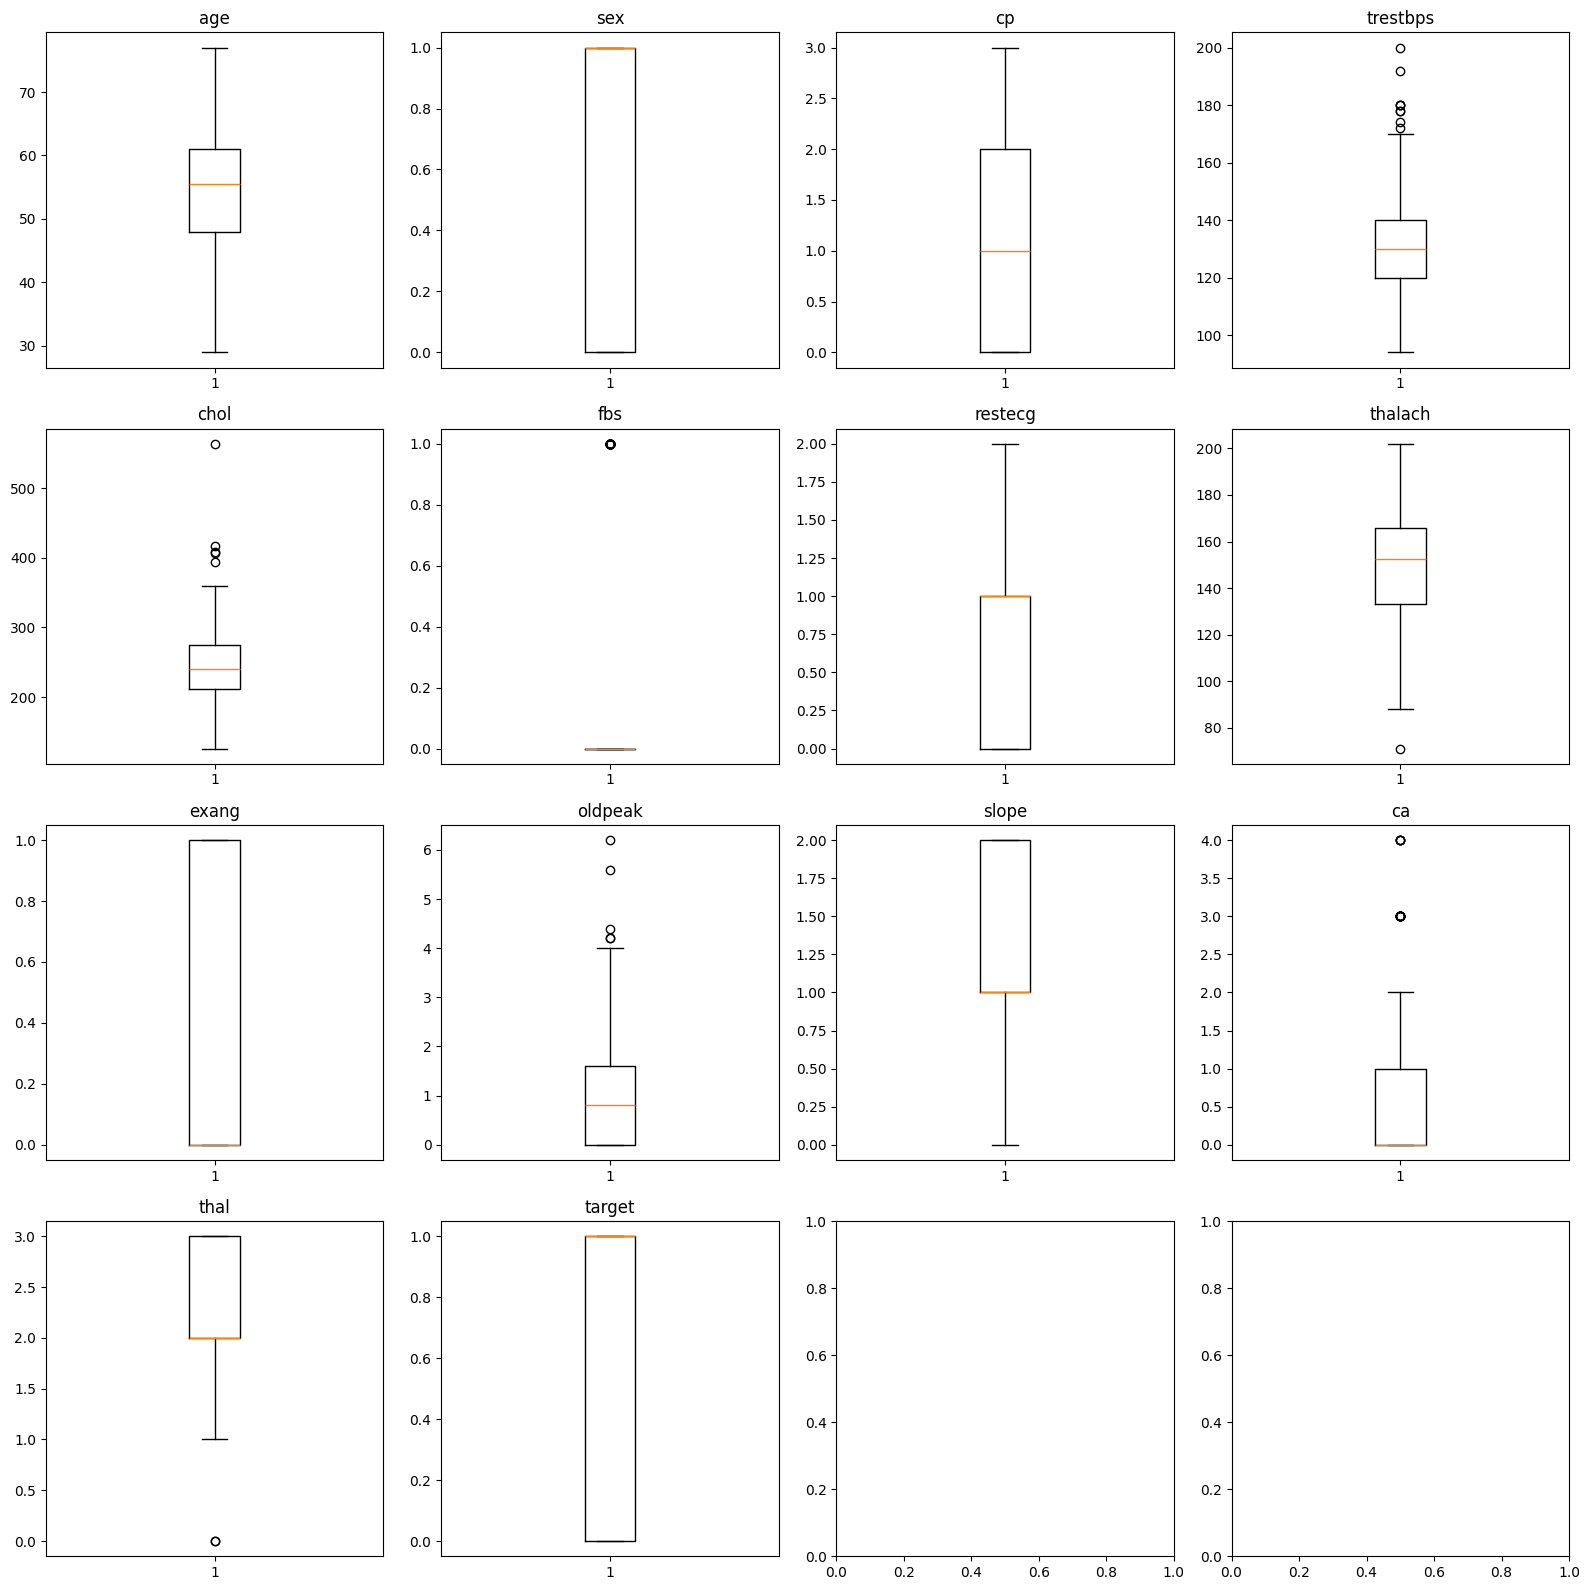

In [19]:
viz_aberrate(df)

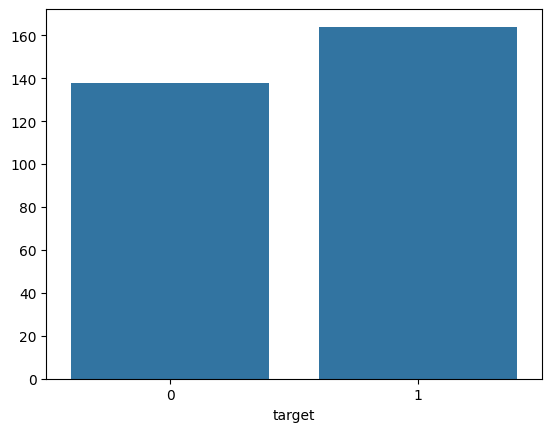

In [20]:
counts = df.target.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show()

on constate que les variables , target sont desequilibree

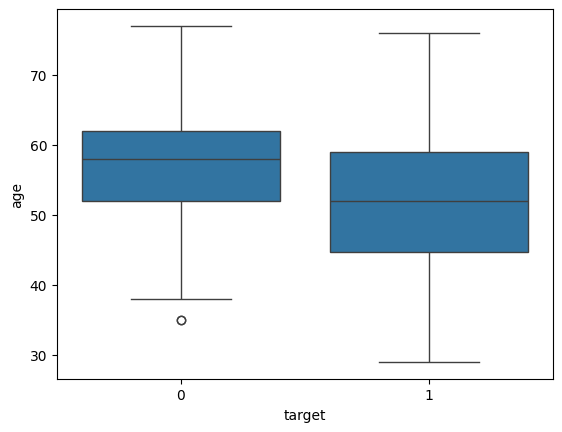

In [21]:
sns.boxplot(x='target' , y='age' , data=df)
plt.show()

On remarque moyennement que ceux qui ont la maladie sont plus âgés

<Axes: xlabel='target', ylabel='chol'>

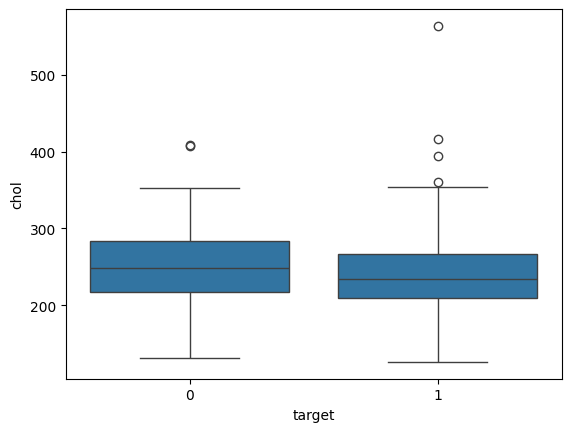

In [22]:
sns.boxplot(x='target', y='chol', data=df)

On remarque que ceux qui ont la maladie ont un taux de cholestérol plus élevé

<Axes: xlabel='target', ylabel='thalach'>

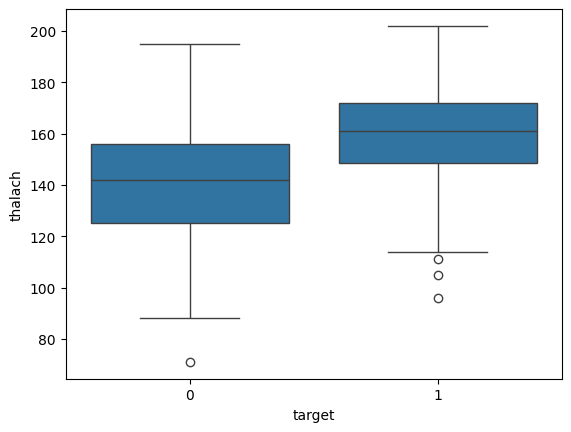

In [23]:
sns.boxplot(x='target',y='thalach', data=df)

la Fréquence cardiaque maximale des personnes malade est plus faible par rapport aux personnes sains


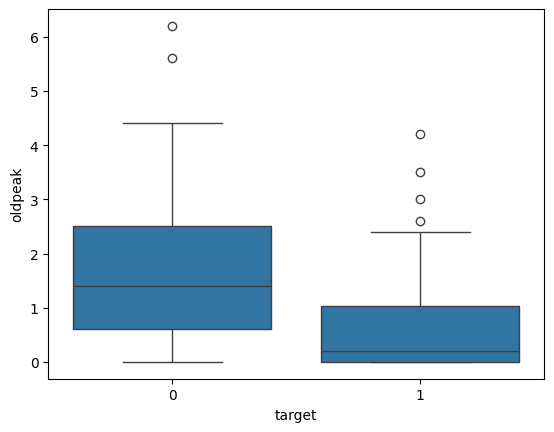

In [24]:
sns.boxplot(y='oldpeak', x='target', data=df)
plt.show()

les personnes malade present des oldpeak beaucoup plus eleves par aux personnes sains

In [25]:
table_sex_target=pd.crosstab(df.sex, df.target)
table_sex_target=table_sex_target.rename(columns={0:'malade',1:'non_malade'}, index={0:'femme',1:'homme'})
table_sex_target

target,malade,non_malade
sex,,
femme,24,72
homme,114,92


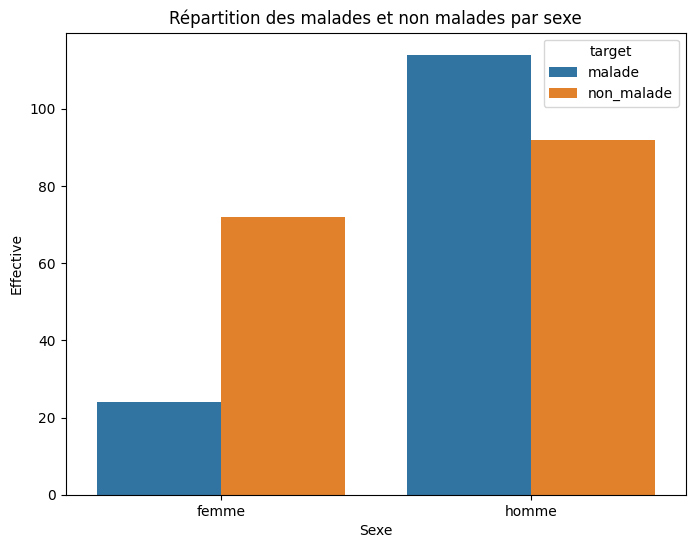

In [26]:
df_melted = table_sex_target.reset_index().melt(id_vars='sex', var_name='target', value_name='count')

# Tracer le barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='count', hue='target', data=df_melted)

# Ajouter des labels et un titre
plt.title("Répartition des malades et non malades par sexe")
plt.xlabel("Sexe")
plt.ylabel("Effective")

# Afficher le graphique
plt.show()

In [27]:
chi2, p, dof, expected = stats.chi2_contingency(table_sex_target)
if p < 0.05:
    print("Il existe une association significative entre le sexe et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre le sexe et l'état de santé.")

Il existe une association significative entre le sexe et l'état de santé.


In [28]:
#Relation target vs Type de douleur thoracique
tabe_cp_target=pd.crosstab(df.cp ,df.target)
tabe_cp_target=tabe_cp_target.rename(index={
    0: "asymptomatique",
    1: "angine atypique",
    2: "douleur sans rapport avec l'angine",
    3: "angine typique"
},columns={0:'malade',1:'non_malade'})
tabe_cp_target

target,malade,non_malade
cp,,
asymptomatique,104,39
angine atypique,9,41
douleur sans rapport avec l'angine,18,68
angine typique,7,16


In [29]:
chi2, p, dof, expected = stats.chi2_contingency(tabe_cp_target)
if p < 0.05:
    print("Il existe une association significative entre le Type de douleur thoracique  et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre le Type de douleur thoracique  et l'état de santé.")

Il existe une association significative entre le Type de douleur thoracique  et l'état de santé.


In [30]:
table_fbs_target =pd.crosstab(df.fbs ,df.target)
chi2, p, dof, expected = stats.chi2_contingency(table_fbs_target)
if p < 0.05:
    print("Il existe une association significative entre  le taux de sucre dans le sang et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre  le taux de sucre dans le sang et l'état de santé.")

Aucune association significative n'a été trouvée entre  le taux de sucre dans le sang et l'état de santé.


In [31]:
table_restecg_target=pd.crosstab(df.restecg,df.target)
chi2, p, dof, expected = stats.chi2_contingency(table_restecg_target)
if p < 0.05:
    print("Il existe une association significative entre  le Résultats de l'électrocardiogramme au repos et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre  le Résultats de l'électrocardiogramme au repos et l'état de santé.")

Il existe une association significative entre  le Résultats de l'électrocardiogramme au repos et l'état de santé.


In [32]:
table_exang_target= pd.crosstab(df.exang, df.target)
chi2, p, dof, expected = stats.chi2_contingency(table_exang_target)
if p < 0.05:
    print("Il existe une association significative entre  le patient a eu une angine pendant l'exercice et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre  le patient a eu une angine pendant l'exercices et l'état de santé.")

Il existe une association significative entre  le patient a eu une angine pendant l'exercice et l'état de santé.


In [33]:
table_slope_target=pd.crosstab(df.slope ,df.target)
chi2, p, dof, expected = stats.chi2_contingency(table_slope_target)
if p < 0.05:
    print("Il existe une association significative entre Pente du segment ST pendant la partie la plus exigeante de l'exercice  et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée Pente du segment ST pendant la partie la plus exigeante de l'exercice et l'état de santé.")

Il existe une association significative entre Pente du segment ST pendant la partie la plus exigeante de l'exercice  et l'état de santé.


In [34]:
tabl_thal_table=pd.crosstab(df.thal, df.target)
chi2, p, dof, expected = stats.chi2_contingency(tabl_thal_table)
if p < 0.05:
    print("Il existe une association significative entre  Résultats du flux sanguin observé via le colorant radioactif et l'état de santé.")
else:
    print("Aucune association significative n'a été trouvée entre Résultats du flux sanguin observé via le colorant radioactif et l'état de santé.")


Il existe une association significative entre  Résultats du flux sanguin observé via le colorant radioactif et l'état de santé.


In [35]:
#selectionner les colone numerique
column_numerique=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                    'restecg', 'thalach', 'exang', 'oldpeak', 
                                    'slope', 'ca', 'thal']


In [36]:
#standartariser les donnees
preprocessus_numerique=StandardScaler()

In [37]:
preprocessus=ColumnTransformer([
    ('scaler',preprocessus_numerique,column_numerique)
])

In [38]:
x=df.drop('target',axis=1)
y=df[['target']]



In [39]:
#separer les donnees en train et test 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)


In [40]:
model_logistic=pipeline(preprocessus,LogisticRegression())
model_logistic

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('logisticregression', LogisticRegression())])

In [41]:
#entrainement du model 
model_logistic.fit(X_train, y_train)

c:\Users\LENOVO\Desktop\projet_cardiaque\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('logisticregression', LogisticRegression())])

In [42]:
logictic_predic=model_logistic.predict(X_test)
logictic_propa=model_logistic.predict_proba(X_test)
accuracy_logistic=accuracy_score(y_test,logictic_predic)
precision_logistic=precision_score(y_test,logictic_predic)

In [43]:
model_forest=pipeline(preprocessus,RandomForestClassifier())
model_forest.fit(X_train,y_train)

c:\Users\LENOVO\Desktop\projet_cardiaque\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## MODEL RANDONFOREST

In [44]:
forest_pred=model_forest.predict(X_test)
forest_proba=model_forest.predict_proba(X_test)
accuracy_forest=accuracy_score(y_test,forest_pred)
precision_forest=precision_score(y_test,forest_pred)


### MODEL SVC

In [45]:
model_svc=pipeline(preprocessus,SVC())
model_svc.fit(X_train,y_train)

c:\Users\LENOVO\Desktop\projet_cardiaque\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('svc', SVC())])

In [46]:
svc_pred=model_svc.predict(X_test)
accuracy_svc=accuracy_score(y_test,svc_pred)
precision_svc=precision_score(y_test,svc_pred)

### resultat score

In [47]:

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVC'],
    'Accuracy': [accuracy_logistic, accuracy_forest, accuracy_svc],
    'Precision': [precision_logistic, precision_forest, precision_svc]
}


df_results = pd.DataFrame(results)

In [48]:
df_results

,Model,Accuracy,Precision
0,Logistic Regression,0.813187,0.833333
1,Random Forest,0.846154,0.872340
2,SVC,0.813187,0.833333


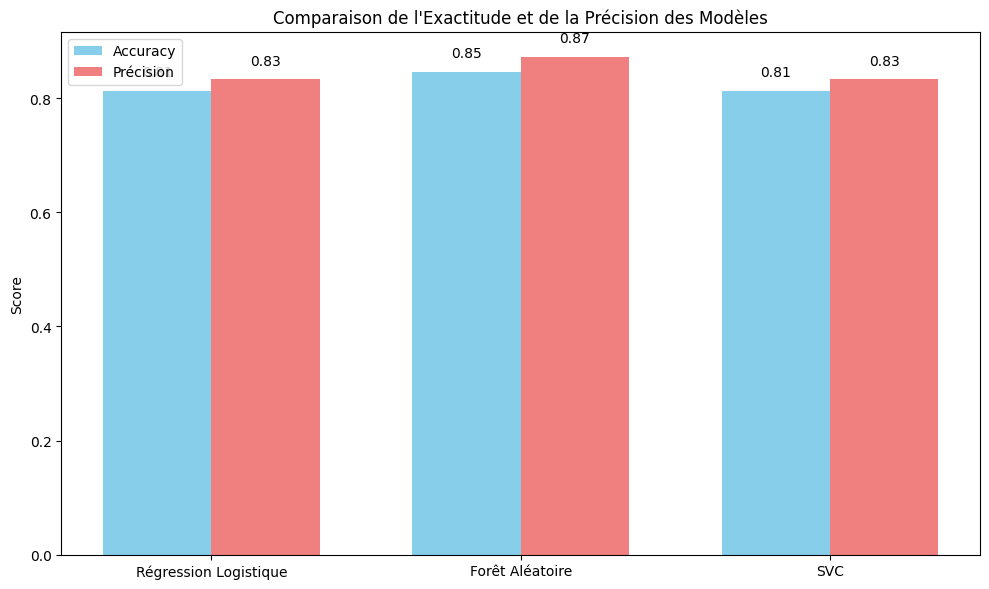

In [49]:

# Supposons que les résultats soient déjà calculés à partir du code donné :
results = {
    'Modèle': ['Régression Logistique', 'Forêt Aléatoire', 'SVC'],
    'Accuracy': [accuracy_logistic, accuracy_forest, accuracy_svc],
    'Précision': [precision_logistic, precision_forest, precision_svc]
}

# Créer un DataFrame
df_results = pd.DataFrame(results)

# Positionner les barres pour éviter le chevauchement
x = np.arange(len(df_results['Modèle']))  # Les positions des modèles sur l'axe X
largeur_barre = 0.35  # Largeur des barres

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres pour l'Exactitude et la Précision
barres_exactitude = ax.bar(x - largeur_barre/2, df_results['Accuracy'], largeur_barre, label='Accuracy', color='skyblue')
barres_precision = ax.bar(x + largeur_barre/2, df_results['Précision'], largeur_barre, label='Précision', color='lightcoral')

# Ajouter les étiquettes sur chaque barre
for barre in barres_exactitude:
    hauteur = barre.get_height()
    ax.text(barre.get_x() + barre.get_width() / 2, hauteur + 0.02, f'{hauteur:.2f}', ha='center', va='bottom')

for barre in barres_precision:
    hauteur = barre.get_height()
    ax.text(barre.get_x() + barre.get_width() / 2, hauteur + 0.02, f'{hauteur:.2f}', ha='center', va='bottom')

# Ajouter les titres et labels
ax.set_title('Comparaison de l\'Exactitude et de la Précision des Modèles')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(df_results['Modèle'])
ax.legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()


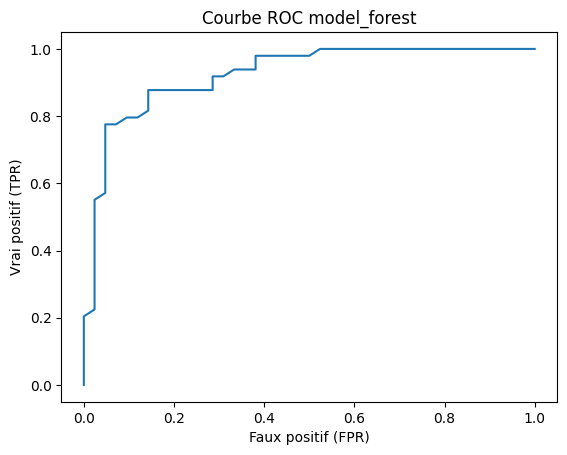

In [50]:
#le courbe roc 
fpr, tpr, _ = roc_curve(y_test, forest_proba[:,1])
# Tracer la courbe ROC
plt.plot(fpr, tpr)
plt.xlabel('Faux positif (FPR)')
plt.ylabel('Vrai positif (TPR)')
plt.title('Courbe ROC model_forest')
plt.show()

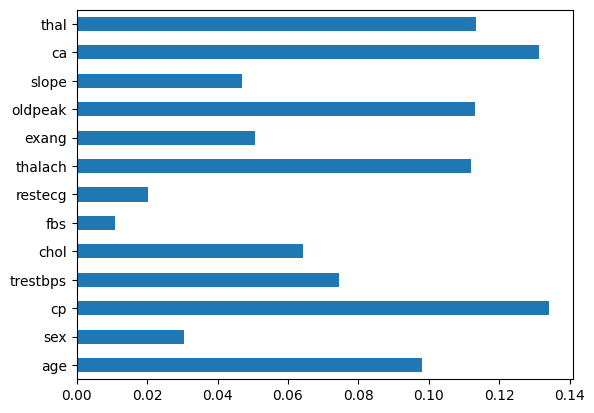

In [51]:
coef=model_forest[-1].feature_importances_
weights = pd.Series(coef, index=column_numerique)
weights.plot.barh()
plt.show()

voir les valeur manquante avec bibliotechnique sidetable

In [52]:
# pip install sidetable

In [53]:
# import sidetable

In [55]:
# df.stb.missing()

Heroku
streamlit 
flask
HU

In [56]:
#sauvegarder  le model 
import joblib

joblib.dump(model_forest,'best_model.pkl')

['best_model.pkl']